### Problem Statement : Solve real world business problem using the Breast Cancer Dataset

- **Business Understanding** : Breast cancer is one of the most common cases amongst women world wide. Early detection and accurate diagnosis are crucial for effective treatment and improved patient outcomes.

- **Develop Hypothesis** : 
    - ***Hypothesis-1***: Features such as tumor size ,shape and texture may have a significant impact on determining whether a tumor is malignant or benign.
    - ***Hypothesis-2***: Certain types of features might be indicative of different types of breast cancer.
    
- **Data Collection**: we will use sklearn Breast Cancer dataset.

- **Problem Mapping**: Understand the type of problem. The problem is Binary classication task where we need to classify tumors as malignant or Benign based on their features.

- **Solution Approach**: 
    - We will use machine learning alogrithms such as Logistic Regression, Decision Trees and Random Forest for classification.
    - We will perform hyperparameter tuning to find the best model.

- **EDA(Exploratory Data Analysis**:
    - Analyze the data to understand its structure, distribution and relationships.
    - Perform visualizations to gain the insights about the important features and correlation.
    - Handle missing values and outliers
    - Perform feature engineering to create new features or transform the existing features.
    
- **Model Building**:
    - Train multiple classifcation models using Breast Cancer Dataset
    - Evaluate each model's performance using appropriate metrics such as accuracy, precision, recall, F1-score and ROC AUC.

- **Model Evaluation**:
    - Select the best performing model on evaluation metrics
    - Plot the ROC AUC Curve and determine the best threshold for classification

- **Handle Data Imbalance**:
    - If the data is imbalanced, use technique such as Oversampling(SMOTE) or undersampling to balance the classes.

- **Demonstrate saving and Loading Model**
    - Save the trained model to the disk(local file) using pickle or joblib
    - Reload the saved model and demonstarte its use for making predictions.
    
    


In [48]:
# Import necessary libraires
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV # Hyperparameter
from imblearn.over_sampling import SMOTE # handle class imbalance
import pickle # to save the model

# Miscellaneous libraries
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Load the Breast cancer Dataset
data = load_breast_cancer()
# Description about dataset
print(data['DESCR'])

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
# Data undertsanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
# distribution of the dataset
df.describe(percentiles=[0.05,.10,.25,.5,.75,.90,.95,.99,1])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
5%,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,0.160100,0.540140,1.132800,11.360000,0.003690,0.007892,0.003253,0.003831,0.011758,0.001522,10.534000,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558,0.000000
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,0.183080,0.640400,1.280200,13.160000,0.004224,0.009169,0.007726,0.005493,0.013012,0.001710,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
90%,19.530000,24.992000,129.100000,1177.400000,0.114820,0.175460,0.203040,0.100420,0.214940,0.072266,0.748880,1.909400,5.123200,91.314000,0.010410,0.047602,0.058520,0.018688,0.030120,0.006185,23.682000,33.646000,157.740000,1673.000000,0.161480,0.447840,0.571320,0.208940,0.360080,0.106320,1.000000


In [24]:
# analyze the target column
df['target'].value_counts()/len(df['target'])

target
1    0.627417
0    0.372583
Name: count, dtype: float64

- There seems to be dataimbalance which we will handle

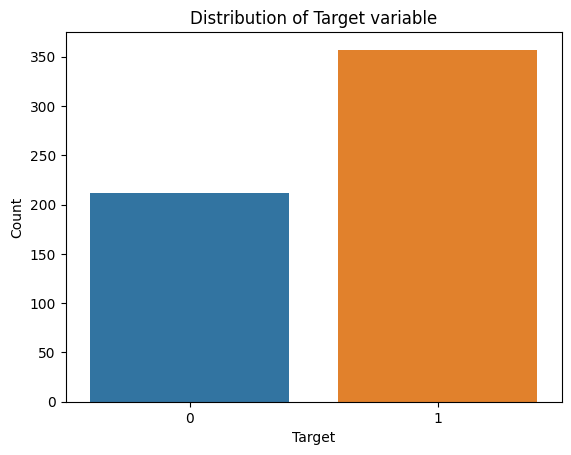

In [26]:
# visualize the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title("Distribution of Target variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

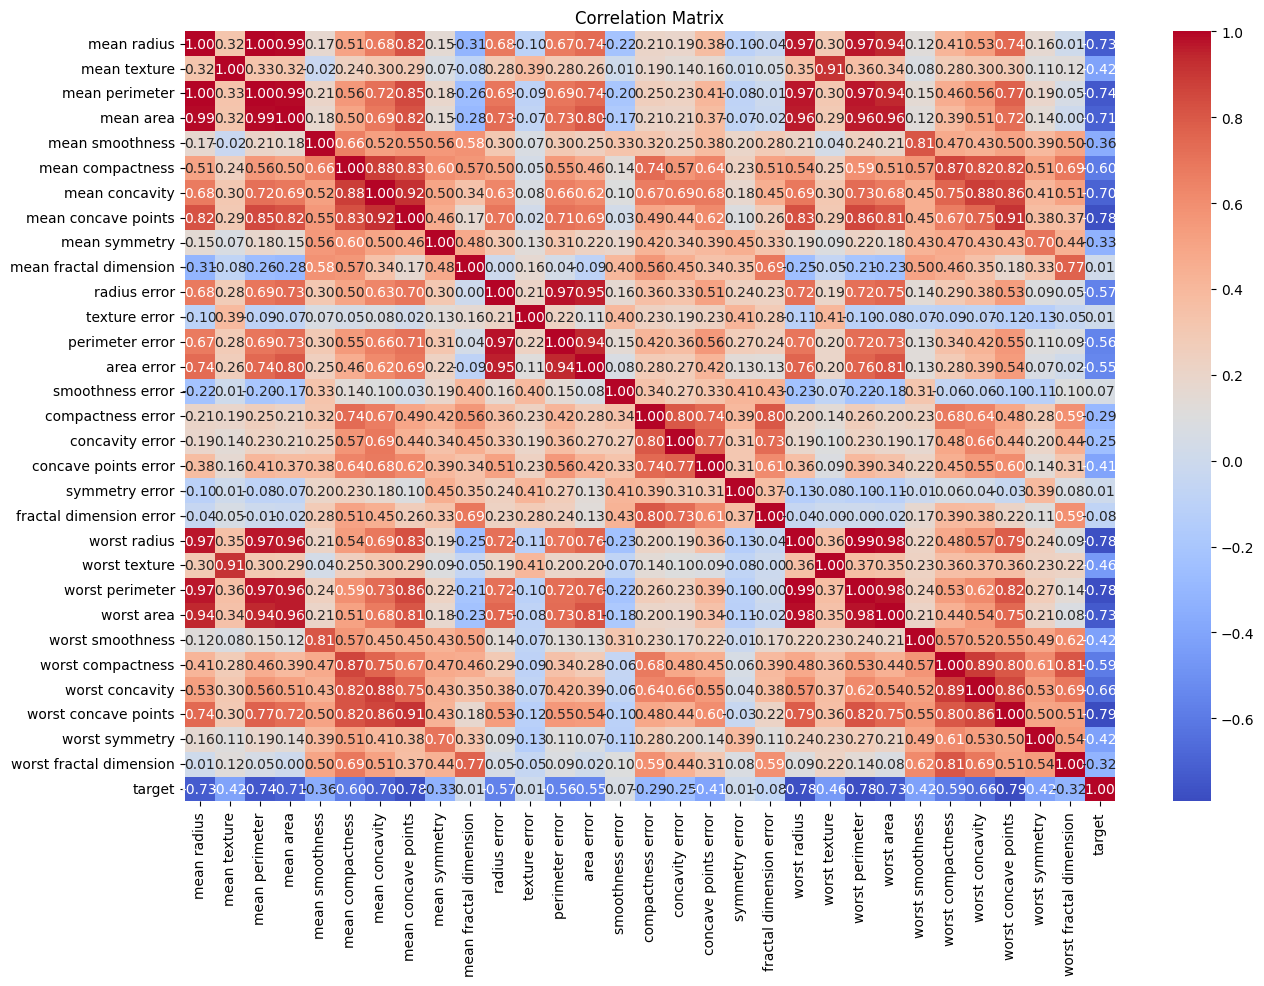

In [27]:
# visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm', fmt =".2f")
plt.title("Correlation Matrix")
plt.show()

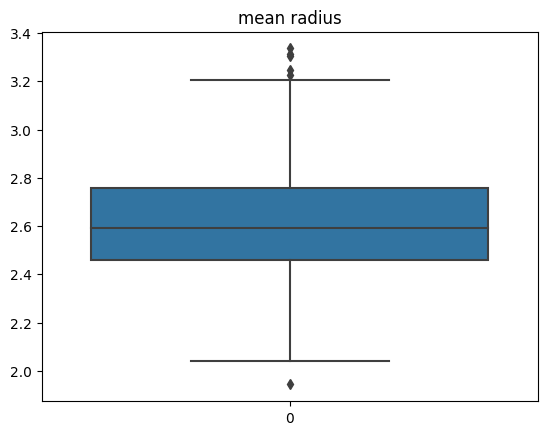

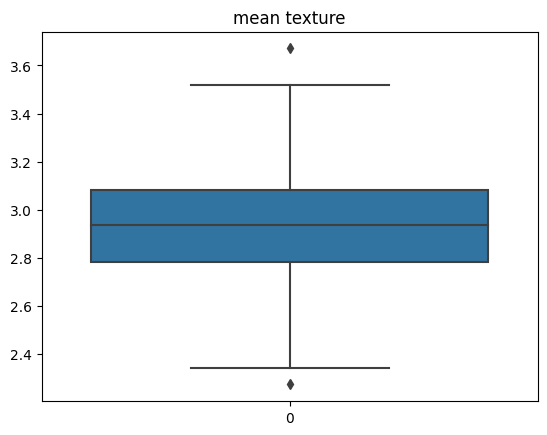

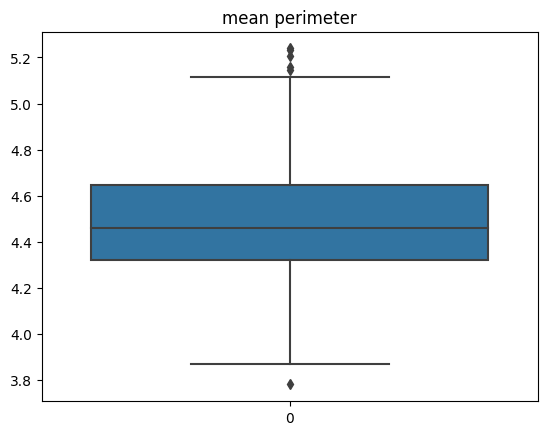

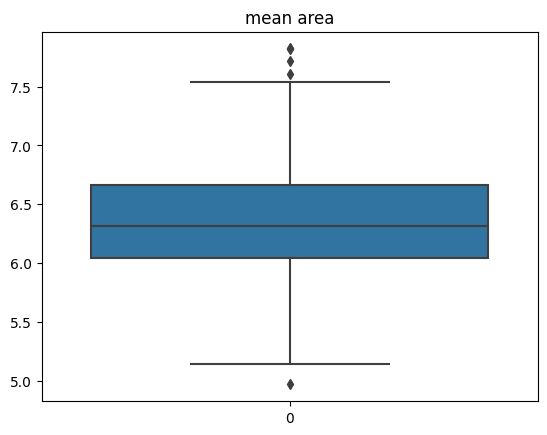

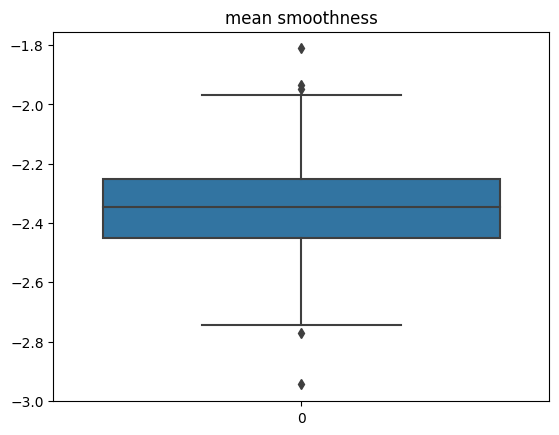

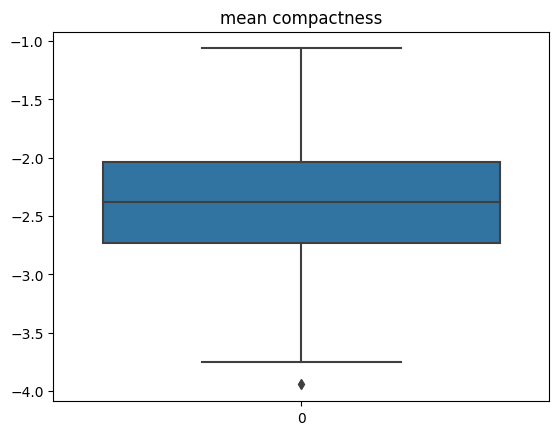

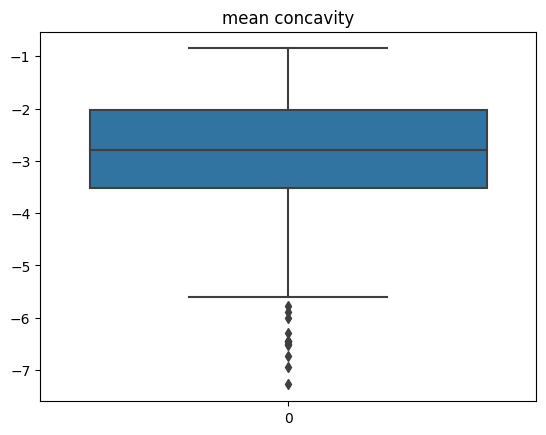

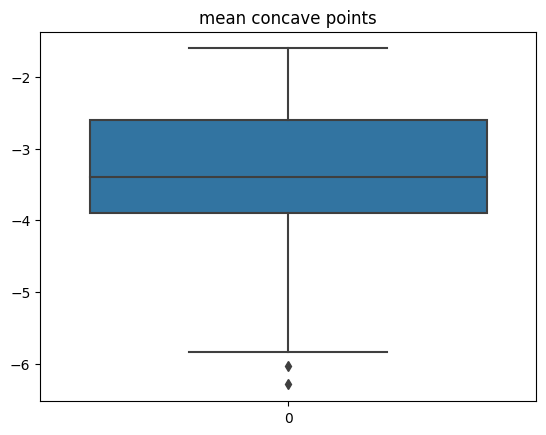

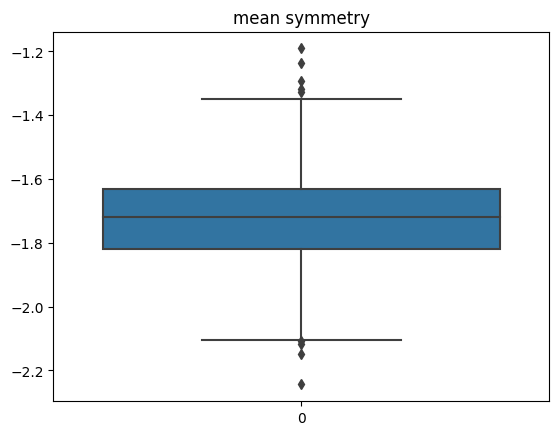

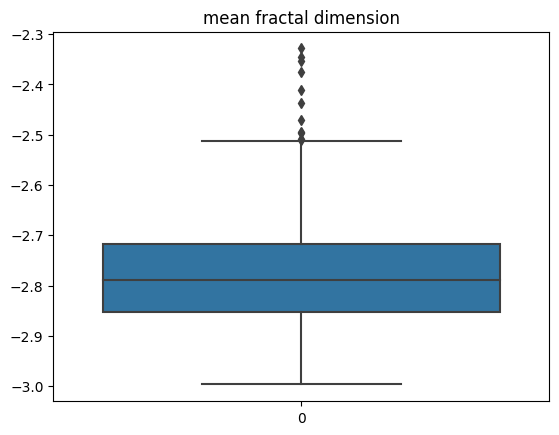

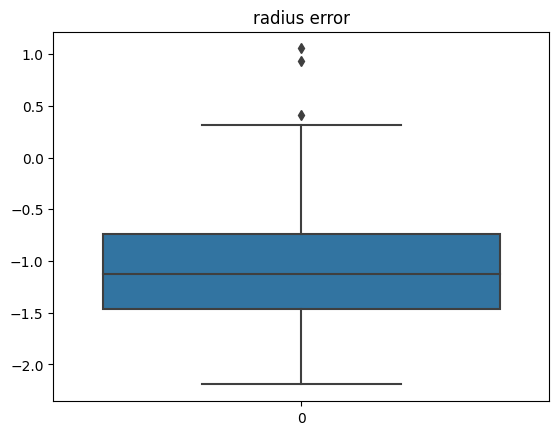

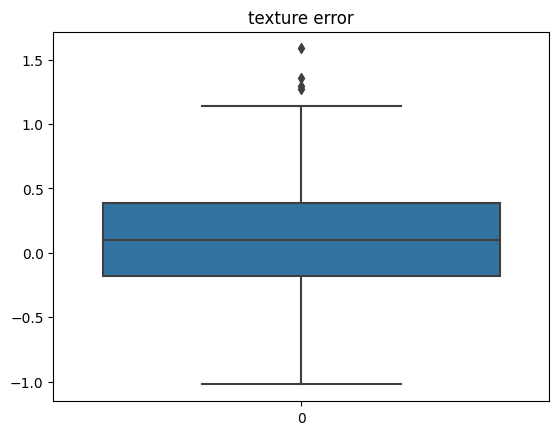

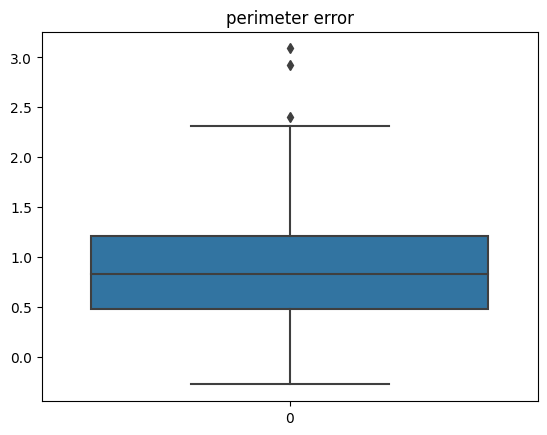

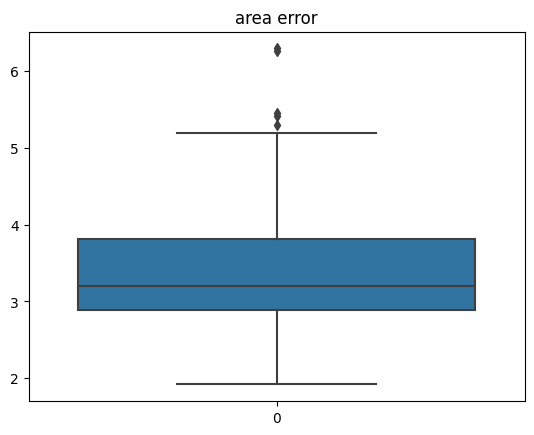

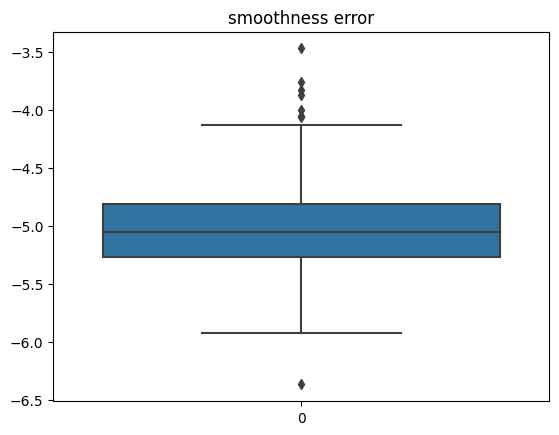

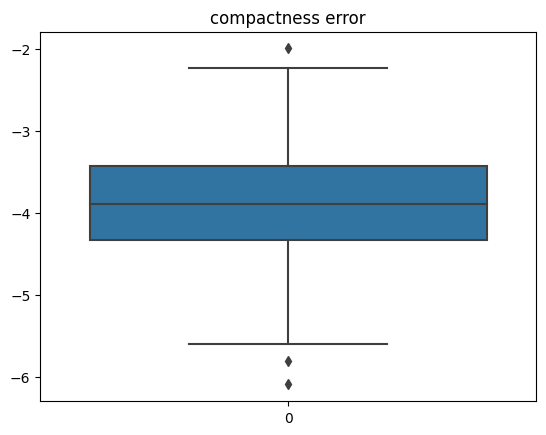

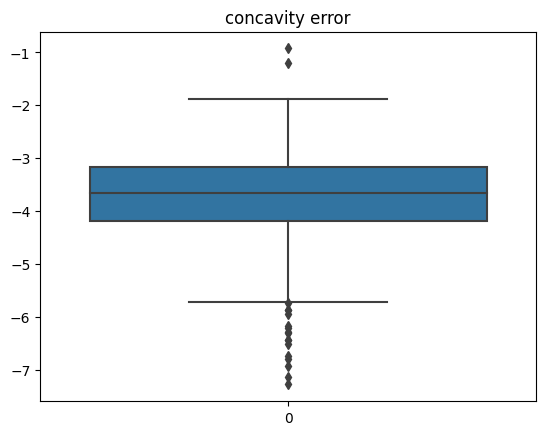

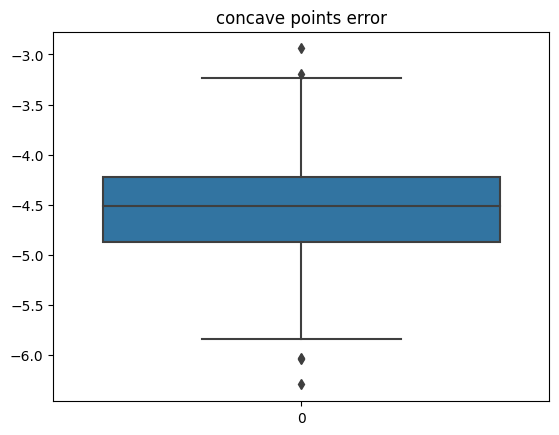

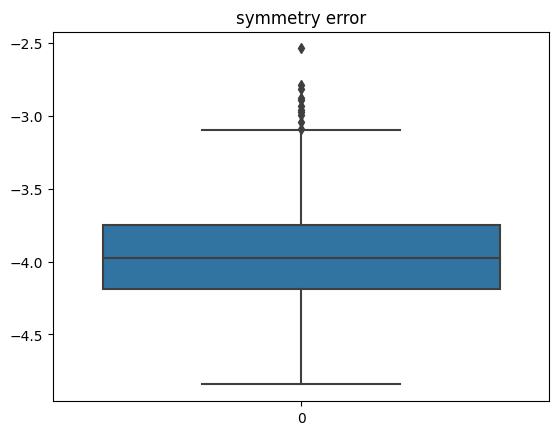

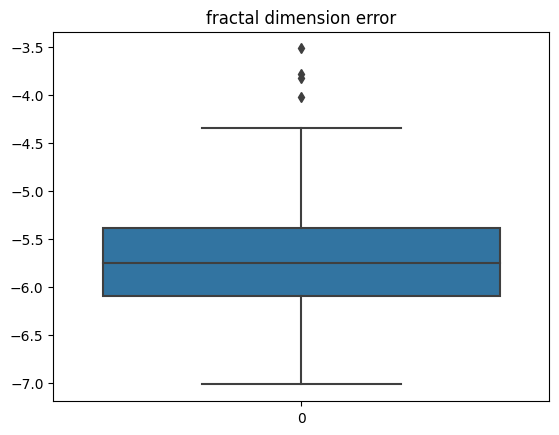

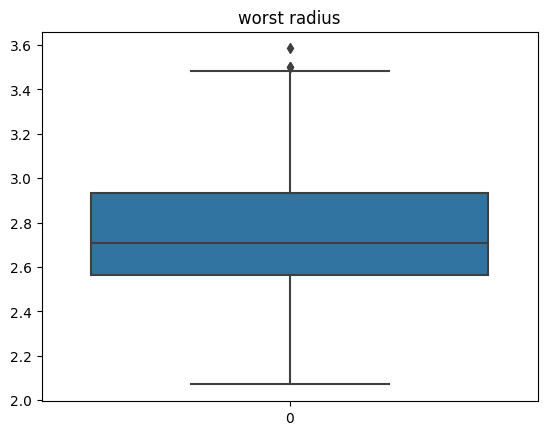

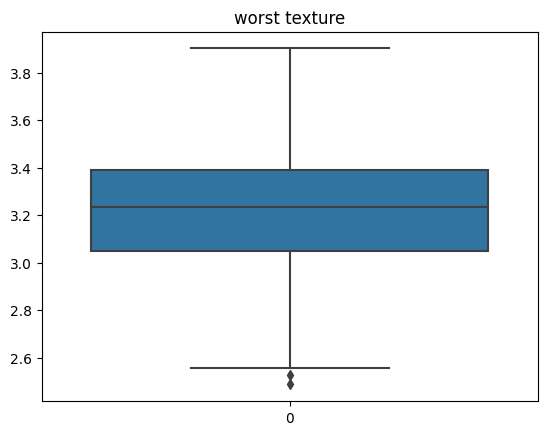

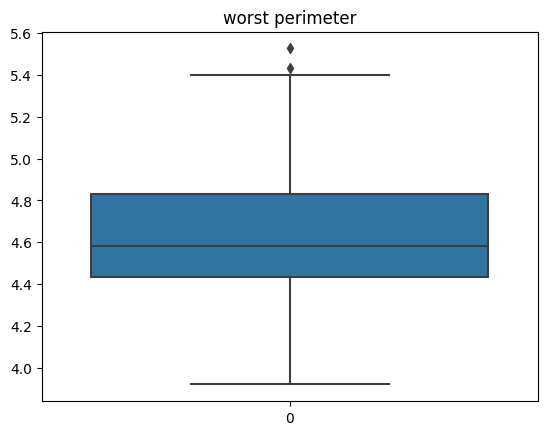

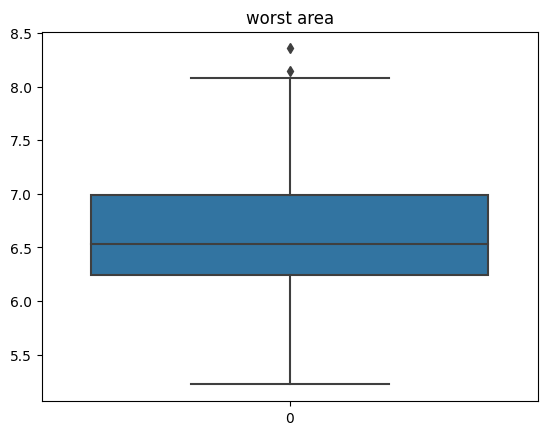

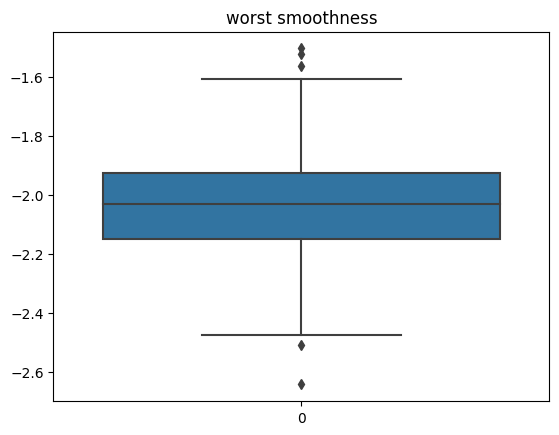

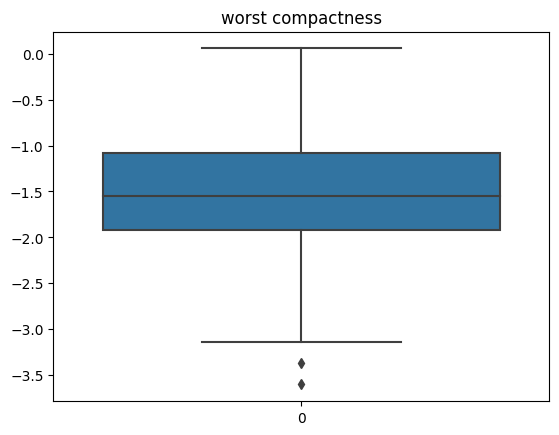

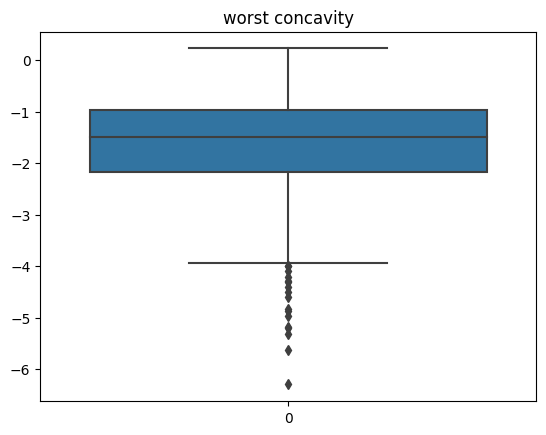

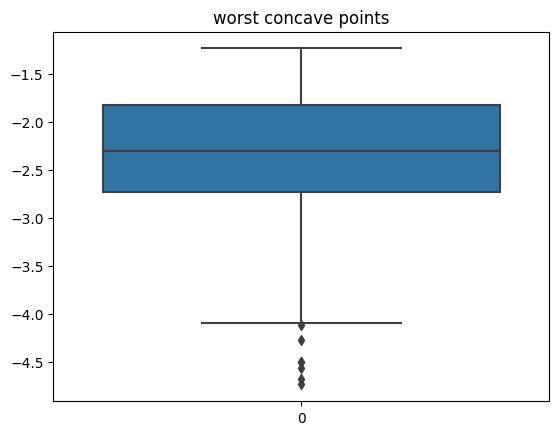

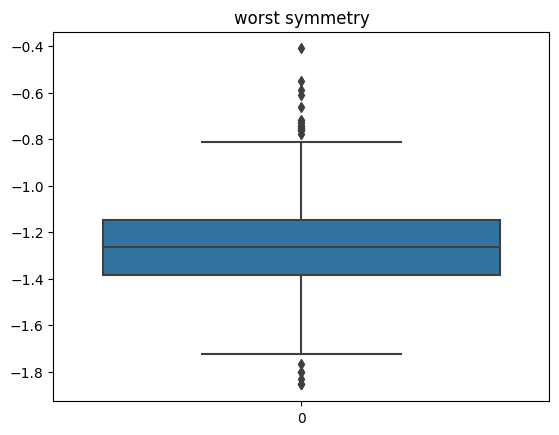

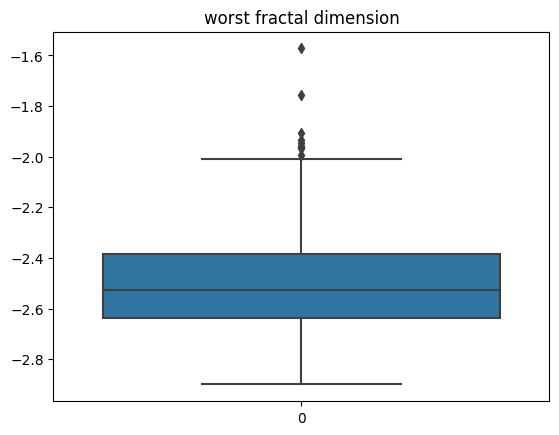

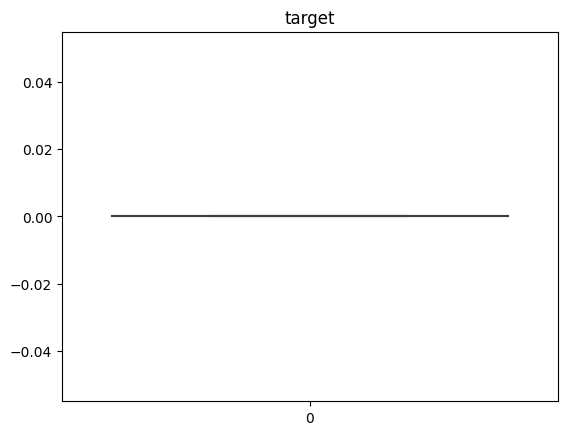

In [34]:
# box plot for mean texture

for i in df.columns:
    sns.boxplot(np.log(df[i]))
    plt.title(i)
    plt.show()

### Feature Engineering

In [35]:
# create your new features from the business undertsanding point of view

In [36]:
# Data Preparation
X = df.drop('target', axis=1)
y = df['target']

In [37]:
X.shape, y.shape

((569, 30), (569,))

In [38]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [39]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and transform on the train dataset
X_test_scaled = scaler.transform(X_test) # transforming test dataset

In [40]:
X_train_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [41]:
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [44]:
# Handling the Data Imbalance using SMOTE 
# create the synthteic data
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train) 

In [45]:
X_train_resampled.shape,y_train_resampled.shape

((572, 30), (572,))

In [46]:
y_train_resampled.value_counts()

target
1    286
0    286
Name: count, dtype: int64

In [47]:
y_train.value_counts()

target
1    286
0    169
Name: count, dtype: int64

# Model Building

create the base/default model

In [49]:
# Base Logistic Regression Model 
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_resampled,y_train_resampled)

# Base Decision tree Model 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled,y_train_resampled)

# Base Random Forest Model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [56]:
# Model Evaluation
models = {"Logistic Regression": lr_model, "Decision Tree":dt_model, "Random Forest": rf_model}

results ={}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    results[name] = {'Accuracy' :accuracy,'Precision':precision,'Recall':recall, 'F1 Score':f1, 'ROC AUC':roc_auc}

In [60]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.982456,0.973684,0.973684
Precision,0.985915,1.000000,0.985714
Recall,0.985915,0.957746,0.971831
F1 Score,0.985915,0.978417,0.978723
ROC AUC,0.981330,0.978873,0.974288


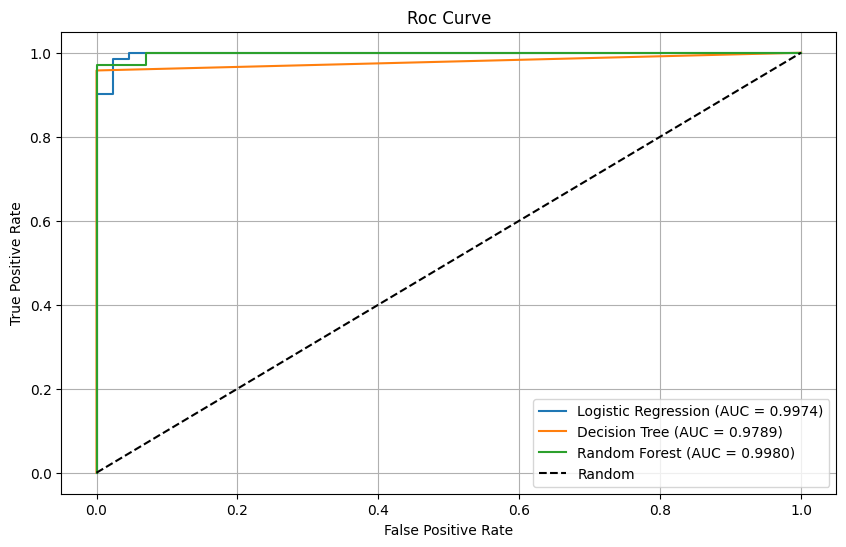

In [70]:
# plot the ROC AUC Curve
plt.figure(figsize=(10,6))
for name,model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr,_ = roc_curve(y_test, y_pred_proba) 
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0,1],[0,1],'k--', label ='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
for k, v in results.items():
    print(results[k]['ROC AUC'])

0.9813298395021289
0.9788732394366197
0.9742875859810023


In [76]:
# Select the best model based on ROC AUC Score
best_model_name = max(results, key= lambda k : results[k]['ROC AUC'])
best_model = models[best_model_name]
print(f'Best model :{best_model}')

Best model :LogisticRegression(max_iter=10000)


In [ ]:
100 Rows - Training Dataset

Set:1 20
Set:2 20
Set:3 20
Set:4 20
Set:5 20

RandomForestClassifier(n_estimators=50,max_depth=None) - Fit 
It wil fit first time on Set-2 till set-5 (80 rows) and evaluate the model on set-1

It will fit the model on set-1,set-3,set-4,set-5 and evaluate on set-2


In [77]:
# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50,100,200], 'max_depth':[None,5,10,20]}

#best parameter
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5, scoring='roc_auc')

#fit the model
grid_search.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [79]:
print(f'Best Hyperparameters :{grid_search.best_params_}')
print(f'Best ROC AUC Score after Hyper Parameter Tuning :{grid_search.best_score_:.4f}')

Best Hyperparameters :{'max_depth': None, 'n_estimators': 200}
Best ROC AUC Score after Hyper Parameter Tuning :0.9934


In [81]:
best_params = grid_search.best_params_

In [82]:
# Train the model with best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

In [83]:
# Model Evaluation 
y_pred = best_rf_clf.predict(X_test_scaled)
print("Clasification Report:")
print(classification_report(y_test,y_pred))

Clasification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [84]:
# Calculate the ROC AUC Score
y_pred_proba = best_rf_clf.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC Score : ", roc_auc)

ROC AUC Score :  0.9626596790042582


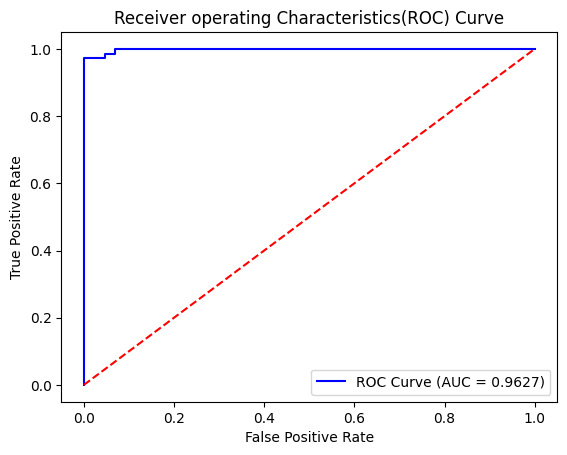

In [86]:
# Plot the ROC AUC Curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="blue",label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1],color='red',linestyle ='--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristics(ROC) Curve")
plt.legend()
plt.show()

In [87]:
# Saving the trained model
with open('best_rf_clf.pkl','wb') as f :
    pickle.dump(best_rf_clf,f)